In [4]:
import pandas as pd
import wandb
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

api = wandb.Api()
entity, project = "juliannapiskorz", "AFA4CATE_FIXED"
runs = api.runs(entity + "/" + project)

score_dict_03 = defaultdict(dict)
stype_error_dict_03 = defaultdict(dict)
tau_var_dict_03 = defaultdict(dict)
predictive_acquisition_dict_03 = defaultdict(dict)

i = 0

for run in runs:
    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config = {k: v for k, v in run.config.items() if not k.startswith("_")}
    if (config["experiment_name"] == 'ultimate_acic2016'
        and config["rho_TE"] == 0.3
        and config['subsample'] == 'random'
        and config["setup_pi"] == 'confounding'):

        acquisition_metric = config["acquisition_metric"]
        seed = config["seed"]

        if acquisition_metric in ["r_TE", "r_PO", "r_sTE", "random"]:
            i += 1
            hist = run.history()
            if 'timestep' in hist.columns and 'score' in hist.columns:
                hist['timestep'] += 1
                score_dict_03[acquisition_metric][seed] = hist[['timestep', 'score']][1:19]
                stype_error_dict_03[acquisition_metric][seed] = hist[['timestep', 'stype_error']][1:19]
                tau_var_dict_03[acquisition_metric][seed] = hist[['timestep', 'tau_var']][1:19]
                predictive_acquisition_dict_03[acquisition_metric][seed] = hist[['timestep', 'predictive_acquisition']][19:36]
print(i)

40


In [5]:
import pandas as pd
import wandb
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

api = wandb.Api()
entity, project = "juliannapiskorz", "AFA4CATE_FIXED"
runs = api.runs(entity + "/" + project)

score_dict_07 = defaultdict(dict)
stype_error_dict_07 = defaultdict(dict)
tau_var_dict_07 = defaultdict(dict)
predictive_acquisition_dict_07 = defaultdict(dict)

i = 0

for run in runs:
    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config = {k: v for k, v in run.config.items() if not k.startswith("_")}
    if (config["experiment_name"] == 'ultimate_acic2016'
        and config["rho_TE"] == 0.7
        and config['subsample'] == 'random'
        and config["setup_pi"] == 'confounding'):

        acquisition_metric = config["acquisition_metric"]
        seed = config["seed"]

        if acquisition_metric in ["r_TE", "r_PO", "r_sTE", "random"]:
            hist = run.history()
            if 'timestep' in hist.columns and 'score' in hist.columns:
                i += 1
                hist['timestep'] += 1
                score_dict_07[acquisition_metric][seed] = hist[['timestep', 'score']][1:19]
                stype_error_dict_07[acquisition_metric][seed] = hist[['timestep', 'stype_error']][1:19]
                tau_var_dict_07[acquisition_metric][seed] = hist[['timestep', 'tau_var']][1:19]
                predictive_acquisition_dict_07[acquisition_metric][seed] = hist[['timestep', 'predictive_acquisition']][19:36]

print(i)

40


In [9]:
# Dictionary to hold processed data
# Structure: {experiment: DataFrame with 'timestep', 'mean', 'std'}
processed_score_03 = {}
processed_tau_var_03 = {}
processed_stype_error_03 = {}
processed_predictive_acquisition_03 = {}

for acquisition_metric, seeds in score_dict_03.items():
    # Combine all seeds into a single DataFrame
    combined_df = pd.DataFrame()

    for seed, df in seeds.items():
        df = df.copy()
        df.rename(columns={'score': f'seed_{seed}'}, inplace=True)
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on='timestep', how='inner')

    if not combined_df.empty:
        # Compute mean and std across seeds
        seed_columns = [col for col in combined_df.columns if col.startswith('seed_')]
        combined_df['mean'] = combined_df[seed_columns].mean(axis=1)
        combined_df['std'] = combined_df[seed_columns].std(axis=1)
        processed_score_03[acquisition_metric] = combined_df[['timestep', 'mean', 'std']]
    else:
        print(f"No data available for metric '{acquisition_metric}'.")

for acquisition_metric, seeds in tau_var_dict_03.items():
    # Combine all seeds into a single DataFrame
    combined_df = pd.DataFrame()

    for seed, df in seeds.items():
        df = df.copy()
        df.rename(columns={'tau_var': f'seed_{seed}'}, inplace=True)
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on='timestep', how='inner')

    if not combined_df.empty:
        # Compute mean and std across seeds
        seed_columns = [col for col in combined_df.columns if col.startswith('seed_')]
        combined_df['mean'] = combined_df[seed_columns].mean(axis=1)
        combined_df['std'] = combined_df[seed_columns].std(axis=1)
        processed_tau_var_03[acquisition_metric] = combined_df[['timestep', 'mean', 'std']]
    else:
        print(f"No data available for metric '{acquisition_metric}'.")

for acquisition_metric, seeds in stype_error_dict_03.items():
    # Combine all seeds into a single DataFrame
    combined_df = pd.DataFrame()

    for seed, df in seeds.items():
        df = df.copy()
        df.rename(columns={'stype_error': f'seed_{seed}'}, inplace=True)
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on='timestep', how='inner')

    if not combined_df.empty:
        # Compute mean and std across seeds
        seed_columns = [col for col in combined_df.columns if col.startswith('seed_')]
        combined_df['mean'] = combined_df[seed_columns].mean(axis=1)
        combined_df['std'] = combined_df[seed_columns].std(axis=1)
        processed_stype_error_03[acquisition_metric] = combined_df[['timestep', 'mean', 'std']]
    else:
        print(f"No data available for metric '{acquisition_metric}'.")

for acquisition_metric, seeds in predictive_acquisition_dict_03.items():
    # Combine all seeds into a single DataFrame
    combined_df = pd.DataFrame()

    for seed, df in seeds.items():
        df = df.copy()
        df.rename(columns={'predictive_acquisition': f'seed_{seed}'}, inplace=True)
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on='timestep', how='inner')

    if not combined_df.empty:
        # Compute mean and std across seeds
        seed_columns = [col for col in combined_df.columns if col.startswith('seed_')]
        combined_df['mean'] = combined_df[seed_columns].mean(axis=1)
        combined_df['std'] = combined_df[seed_columns].std(axis=1)
        processed_predictive_acquisition_03[acquisition_metric] = combined_df[['timestep', 'mean', 'std']]
    else:
        print(f"No data available for metric '{acquisition_metric}'.")

In [7]:
# Dictionary to hold processed data
# Structure: {experiment: DataFrame with 'timestep', 'mean', 'std'}
processed_score_07 = {}
processed_tau_var_07 = {}
processed_stype_error_07 = {}
processed_predictive_acquisition_07 = {}

for acquisition_metric, seeds in score_dict_07.items():
    # Combine all seeds into a single DataFrame
    combined_df = pd.DataFrame()

    for seed, df in seeds.items():
        df = df.copy()
        df.rename(columns={'score': f'seed_{seed}'}, inplace=True)
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on='timestep', how='inner')

    if not combined_df.empty:
        # Compute mean and std across seeds
        seed_columns = [col for col in combined_df.columns if col.startswith('seed_')]
        combined_df['mean'] = combined_df[seed_columns].mean(axis=1)
        combined_df['std'] = combined_df[seed_columns].std(axis=1)
        processed_score_07[acquisition_metric] = combined_df[['timestep', 'mean', 'std']]
    else:
        print(f"No data available for metric '{acquisition_metric}'.")

for acquisition_metric, seeds in tau_var_dict_07.items():
    # Combine all seeds into a single DataFrame
    combined_df = pd.DataFrame()

    for seed, df in seeds.items():
        df = df.copy()
        df.rename(columns={'tau_var': f'seed_{seed}'}, inplace=True)
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on='timestep', how='inner')

    if not combined_df.empty:
        # Compute mean and std across seeds
        seed_columns = [col for col in combined_df.columns if col.startswith('seed_')]
        combined_df['mean'] = combined_df[seed_columns].mean(axis=1)
        combined_df['std'] = combined_df[seed_columns].std(axis=1)
        processed_tau_var_07[acquisition_metric] = combined_df[['timestep', 'mean', 'std']]
    else:
        print(f"No data available for metric '{acquisition_metric}'.")

for acquisition_metric, seeds in stype_error_dict_07.items():
    # Combine all seeds into a single DataFrame
    combined_df = pd.DataFrame()

    for seed, df in seeds.items():
        df = df.copy()
        df.rename(columns={'stype_error': f'seed_{seed}'}, inplace=True)
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on='timestep', how='inner')

    if not combined_df.empty:
        # Compute mean and std across seeds
        seed_columns = [col for col in combined_df.columns if col.startswith('seed_')]
        combined_df['mean'] = combined_df[seed_columns].mean(axis=1)
        combined_df['std'] = combined_df[seed_columns].std(axis=1)
        processed_stype_error_07[acquisition_metric] = combined_df[['timestep', 'mean', 'std']]
    else:
        print(f"No data available for metric '{acquisition_metric}'.")

for acquisition_metric, seeds in predictive_acquisition_dict_07.items():
    # Combine all seeds into a single DataFrame
    combined_df = pd.DataFrame()

    for seed, df in seeds.items():
        df = df.copy()
        df.rename(columns={'predictive_acquisition': f'seed_{seed}'}, inplace=True)
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on='timestep', how='inner')

    if not combined_df.empty:
        # Compute mean and std across seeds
        seed_columns = [col for col in combined_df.columns if col.startswith('seed_')]
        combined_df['mean'] = combined_df[seed_columns].mean(axis=1)
        combined_df['std'] = combined_df[seed_columns].std(axis=1)
        processed_predictive_acquisition_07[acquisition_metric] = combined_df[['timestep', 'mean', 'std']]
    else:
        print(f"No data available for metric '{acquisition_metric}'.")

In [10]:
# aggregating the results into a gigantic dict
processed_data = {
    'rho_TE_03': {
        'score': processed_score_03,
        'predictive_acquisition': processed_predictive_acquisition_03,
        'stype_error': processed_stype_error_03
    },
    'rho_TE_07': {
        'score': processed_score_07,
        'predictive_acquisition': processed_predictive_acquisition_07,
        'stype_error': processed_stype_error_07
    },
}

### Plotting the score

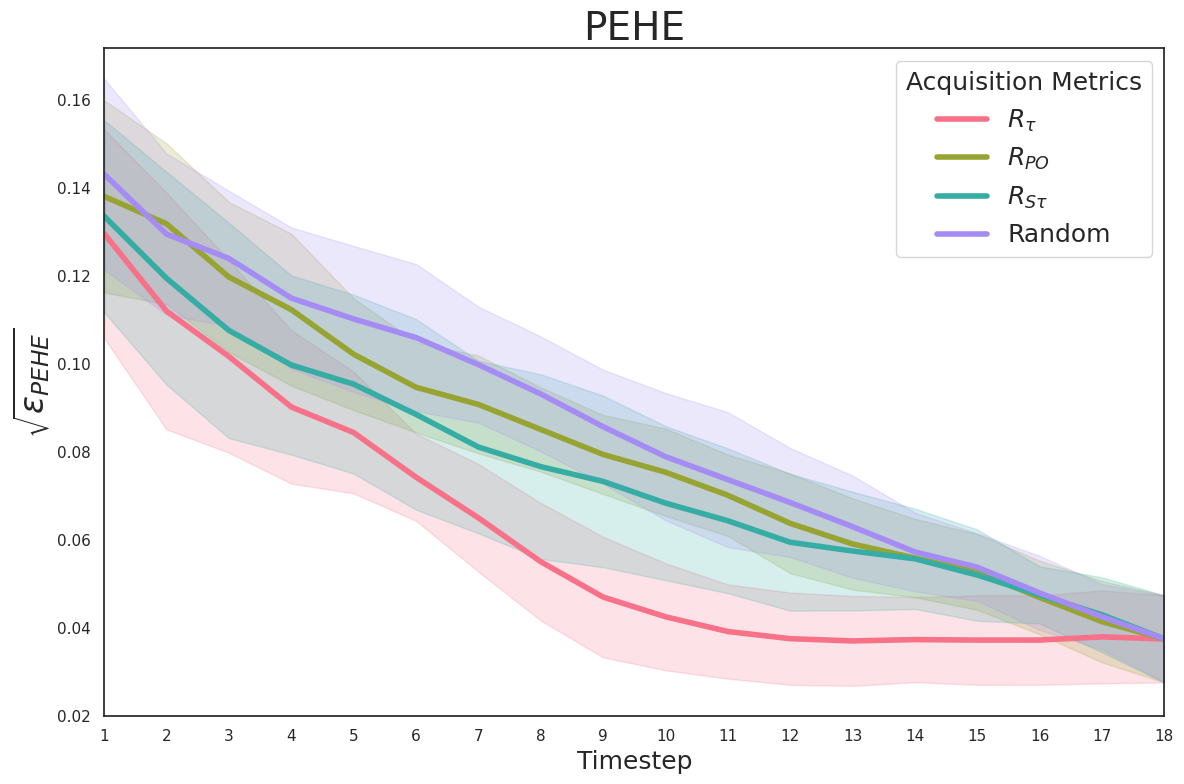

In [6]:
nice_names = {"r_TE": r"$R_\tau$", "r_PO": r"$R_{PO}$", "r_sTE": r"$R_{S\tau}$", "random": "Random"}

# 1. Choose a nicer color palette
#    "Set2" is a good choice for distinct, aesthetically pleasing colors
sns.set(style="white")  # 4. Remove the grid by setting style to "white"

plt.figure(figsize=(12, 8))

# Use a palette with enough distinct colors
palette = sns.color_palette("Set2", len(processed_score_07))  # Changed from "husl" to "Set2"
palette = sns.color_palette("husl", len(processed_score_07))

for idx, (experiment, df) in enumerate(processed_score_07.items()):
    plt.plot(
        df['timestep'],
        df['mean'],
        label=nice_names[experiment],
        color=palette[idx],
        linewidth=4  # 3. Make lines thicker
    )
    plt.fill_between(
        df['timestep'],
        df['mean'] - df['std'],
        df['mean'] + df['std'],
        alpha=0.2,
        color=palette[idx]
    )

# 2. Ensure 'timestep' is integer on x-axis
plt.xticks(sorted(df['timestep'].unique()))  # Set x-ticks to be integer timesteps
plt.xlim(1, 18)
plt.xlabel('Timestep', fontsize=18)
plt.ylabel(r'$\sqrt{\epsilon_{PEHE}}$', fontsize=24)
plt.title('PEHE', fontsize=28)
plt.legend(title='Acquisition Metrics', fontsize=18, title_fontsize=18)
plt.tight_layout()
plt.show()

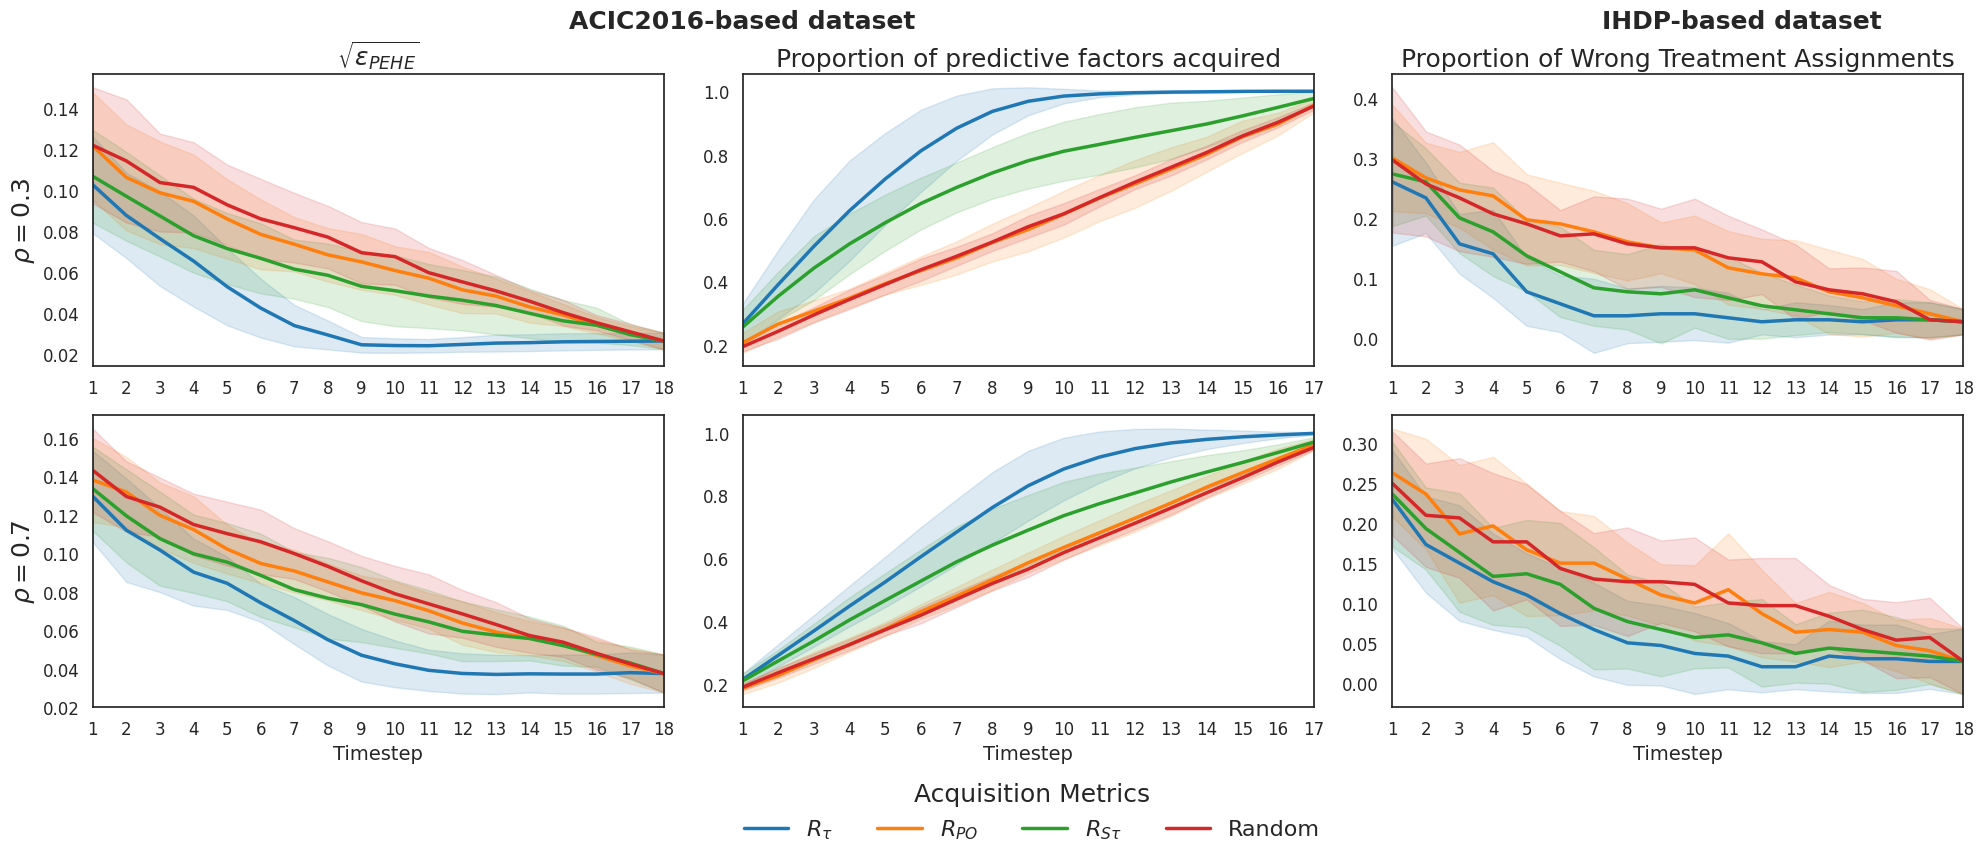

In [7]:
import matplotlib.pyplot as plt

# 1. Create a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 8), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.5, hspace=0.1)

# 2. Define setups and metrics
setups = ['rho_TE_03', 'rho_TE_07']
metrics = ['score', 'predictive_acquisition', 'stype_error']

# 3. Define LaTeX-formatted labels
nice_names = {"r_TE": r"$R_\tau$", "r_PO": r"$R_{PO}$", "r_sTE": r"$R_{S\tau}$", "random": "Random"}
nice_metrics = {"score": r'$\sqrt{\epsilon_{PEHE}}$', "stype_error": "Proportion of Wrong Treatment Assignments", "predictive_acquisition": "Proportion of predictive factors acquired"}
nice_setup = {"rho_TE_03": r"$\rho = 0.3$", "rho_TE_07": r"$\rho = 0.7$"}

# 4. Choose a color palette
palette = sns.color_palette("tab10")

# 5. Plot data in each subplot
for row, setup in enumerate(setups):
    for col, metric in enumerate(metrics):
        ax = axes[row, col]
        for idx, (experiment, df) in enumerate(processed_data[setup][metric].items()):
            ax.plot(
                df['timestep'],
                df['mean'],
                label=nice_names[experiment] if row == 0 and col == 0 else "",
                color=palette[idx],
                linewidth=2.5
            )
            ax.fill_between(
                df['timestep'],
                df['mean'] - df['std'],
                df['mean'] + df['std'],
                alpha=0.15,
                color=palette[idx]
            )
        if row == 0:
            ax.set_title(nice_metrics[metric], fontsize=18)
        if col == 0:
            ax.set_ylabel(nice_setup[setup], fontsize=18)
        if row == len(setups) - 1:
            ax.set_xlabel('Timestep', fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.set_xlim(1, 18)if col != 1 else ax.set_xlim(1, 17)
        ax.set_xticks(range(1, 19)) if col != 1 else ax.set_xticks(range(1, 18))

# 6. Add a single legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(labels), fontsize=16, title='Acquisition Metrics', title_fontsize=18, bbox_to_anchor=(0.52, -0.1), frameon=False,)

# Calculate positions for the titles based on the number of columns
# Assuming the figure has 4 columns, calculate the center of each column
column_positions = [0.125, 0.375, 0.625, 0.875]  # Adjust based on grid layout

# Add titles for the first three columns
fig.text(
    column_positions[1], 0.95,          # x, y coordinates
    "ACIC2016-based dataset",              # Text
    ha='center',        # Horizontal alignment
    va='center',        # Vertical alignment
    fontsize=18,
    fontweight='bold'
)

# Add title for the fourth column
fig.text(
    column_positions[3], 0.95,
    "IHDP-based dataset",
    ha='center',
    va='center',
    fontsize=18,
    fontweight='bold'
)

# 8. Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig('acic2016.png', bbox_inches='tight')

## IHDP Dataset

In [1]:
import pandas as pd
import wandb
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

api = wandb.Api()
entity, project = "juliannapiskorz", "AFA4CATE_FIXED"
runs = api.runs(entity + "/" + project)

score_dict_ihdp = defaultdict(dict)
stype_error_dict_ihdp = defaultdict(dict)
tau_var_dict_ihdp = defaultdict(dict)

i = 0

for run in runs:
    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config = {k: v for k, v in run.config.items() if not k.startswith("_")}
    if (config["experiment_name"] == 'ultimate_ihdp_new'):

        acquisition_metric = config["acquisition_metric"]
        seed = config["seed"]

        if acquisition_metric in ["r_TE", "r_PO", "r_sTE", "random"]:
            i += 1
            hist = run.history()
            if 'timestep' in hist.columns and 'score' in hist.columns:
                hist['timestep'] += 1
                score_dict_ihdp[acquisition_metric][seed] = hist[['timestep', 'score']][1:19]
                stype_error_dict_ihdp[acquisition_metric][seed] = hist[['timestep', 'stype_error']][1:19]
                tau_var_dict_ihdp[acquisition_metric][seed] = hist[['timestep', 'tau_var']][1:19]
print(i)

40


In [2]:
# Dictionary to hold processed data
# Structure: {experiment: DataFrame with 'timestep', 'mean', 'std'}
processed_score_ihdp = {}
processed_tau_var_ihdp = {}
processed_stype_error_ihdp = {}
processed_predictive_acquisition_ihdp = {}

for acquisition_metric, seeds in score_dict_ihdp.items():
    # Combine all seeds into a single DataFrame
    combined_df = pd.DataFrame()

    for seed, df in seeds.items():
        df = df.copy()
        df.rename(columns={'score': f'seed_{seed}'}, inplace=True)
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on='timestep', how='inner')

    if not combined_df.empty:
        # Compute mean and std across seeds
        seed_columns = [col for col in combined_df.columns if col.startswith('seed_')]
        combined_df['mean'] = combined_df[seed_columns].mean(axis=1)
        combined_df['std'] = combined_df[seed_columns].std(axis=1)
        processed_score_ihdp[acquisition_metric] = combined_df[['timestep', 'mean', 'std']]
    else:
        print(f"No data available for metric '{acquisition_metric}'.")

for acquisition_metric, seeds in tau_var_dict_ihdp.items():
    # Combine all seeds into a single DataFrame
    combined_df = pd.DataFrame()

    for seed, df in seeds.items():
        df = df.copy()
        df.rename(columns={'tau_var': f'seed_{seed}'}, inplace=True)
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on='timestep', how='inner')

    if not combined_df.empty:
        # Compute mean and std across seeds
        seed_columns = [col for col in combined_df.columns if col.startswith('seed_')]
        combined_df['mean'] = combined_df[seed_columns].mean(axis=1)
        combined_df['std'] = combined_df[seed_columns].std(axis=1)
        processed_tau_var_ihdp[acquisition_metric] = combined_df[['timestep', 'mean', 'std']]
    else:
        print(f"No data available for metric '{acquisition_metric}'.")

for acquisition_metric, seeds in stype_error_dict_ihdp.items():
    # Combine all seeds into a single DataFrame
    combined_df = pd.DataFrame()

    for seed, df in seeds.items():
        df = df.copy()
        df.rename(columns={'stype_error': f'seed_{seed}'}, inplace=True)
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on='timestep', how='inner')

    if not combined_df.empty:
        # Compute mean and std across seeds
        seed_columns = [col for col in combined_df.columns if col.startswith('seed_')]
        combined_df['mean'] = combined_df[seed_columns].mean(axis=1)
        combined_df['std'] = combined_df[seed_columns].std(axis=1)
        processed_stype_error_ihdp[acquisition_metric] = combined_df[['timestep', 'mean', 'std']]
    else:
        print(f"No data available for metric '{acquisition_metric}'.")

### Combined graphic

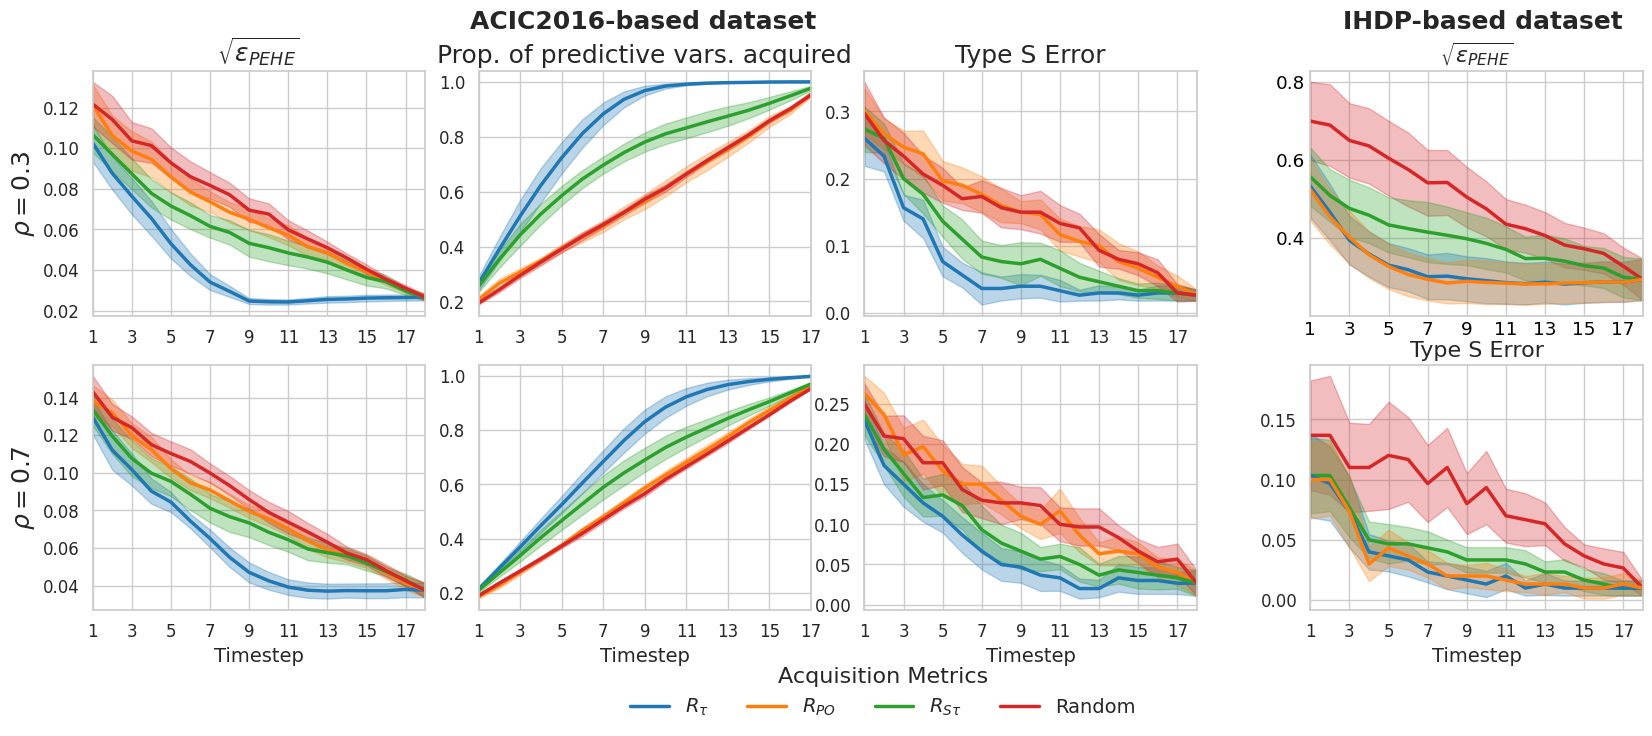

In [16]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
from collections import defaultdict
import numpy as np

# --- Mock Data Preparation ---
# Replace this section with your actual data processing logic
# 2. Define setups and metrics
setups = ['rho_TE_03', 'rho_TE_07']
metrics = ['score', 'predictive_acquisition', 'stype_error']

# 3. Define LaTeX-formatted labels
nice_names = {"r_TE": r"$R_\tau$", "r_PO": r"$R_{PO}$", "r_sTE": r"$R_{S\tau}$", "random": "Random"}
nice_metrics = {"score": r'$\sqrt{\epsilon_{PEHE}}$', "stype_error": "Type S Error", "predictive_acquisition": "Prop. of predictive vars. acquired"}
nice_setup = {"rho_TE_03": r"$\rho = 0.3$", "rho_TE_07": r"$\rho = 0.7$"}

# 4. Choose a color palette
palette = sns.color_palette("tab10")
palette_dict = {"r_TE": palette[0], "r_PO": palette[1], "r_sTE": palette[2], "random": palette[3]}
sns.set(style="whitegrid", context="notebook", font_scale=1.2)

# --- Initialize Figure and GridSpec with Spacer Row ---
fig = plt.figure(figsize=(20, 7))

# Define GridSpec with spacer row
gs = gridspec.GridSpec(nrows=2, ncols=5, height_ratios= [1, 1], width_ratios=[1, 1, 1, 0.02, 1])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.2)


for i, setup in enumerate(setups):
    for j, metric in enumerate(metrics):
        ax = fig.add_subplot(gs[i, j])
        
        experiments = processed_data.get(setup, {}).get(metric, {})
        for exp, df in experiments.items():
            # color = palette[idx]  # Default to black
            color = palette_dict[exp]
            label = nice_names.get(exp, exp)
            plot_label = label if (i == 0 and j == 0) else ""
            
            ax.plot(
                df['timestep'],
                df['mean'],
                label=plot_label,
                color=color,
                linewidth=2.5
            )
            ax.fill_between(
                df['timestep'],
                [m - 1.645*s/np.sqrt(len(df['mean'])) for m, s in zip(df['mean'], df['std'])],
                [m + 1.645*s/np.sqrt(len(df['mean'])) for m, s in zip(df['mean'], df['std'])],
                alpha=0.3,
                color=color
            )
        
        if i == 0:
            ax.set_title(nice_metrics[metric], fontsize=18)
        if j == 0:
            ax.set_ylabel(nice_setup[setup], fontsize=18)
        if i == 1:
            ax.set_xlabel('Timestep', fontsize=14)
        ax.tick_params(axis='both', which='major', direction='out', labelsize=12)
        ax.set_xlim(1, 18) if j != 1 else ax.set_xlim(1, 17)
        ax.set_xticks(range(1, 19, 2)) if j != 1 else ax.set_xticks(range(1, 18, 2))

# --- Plot Second Dataset (2x1 Grid) ---

ax = fig.add_subplot(gs[0, 4])
for idx, (experiment, df) in enumerate(processed_score_ihdp.items()):
    color = palette_dict[experiment] # Default to black
    label = nice_names.get(exp, exp)
    plot_label = label
    
    ax.plot(
        df['timestep'],
        df['mean'],
        label=plot_label,
        color=color,
        linewidth=2.5
    )
    ax.fill_between(
        df['timestep'],
        [m - 1.645*s/np.sqrt(len(df['mean'])) for m, s in zip(df['mean'], df['std'])],
        [m + 1.645*s/np.sqrt(len(df['mean'])) for m, s in zip(df['mean'], df['std'])],
        alpha=0.3,
        color=color
    )

# Set subplot titles and labels
ax.set_title(nice_metrics['score'], fontsize=16)
# ax.set_xlabel('Timestep', fontsize=14)
ax.minorticks_on()
ax.tick_params(
    axis='both',
    which='both',
    direction='in',
    length=3,
    width=1,
    colors='black'
)
ax.set_xlim(1, 18)
ax.set_xticks(range(1, 19, 2))

ax = fig.add_subplot(gs[1, 4])
for idx, (experiment, df) in enumerate(processed_stype_error_ihdp.items()):
    color = palette_dict[experiment] # Default to black
    label = nice_names.get(exp, exp)
    plot_label = label
    
    ax.plot(
        df['timestep'],
        df['mean'],
        label=plot_label,
        color=color,
        linewidth=2.5
    )
    ax.fill_between(
        df['timestep'],
        [m - 1.645*s/np.sqrt(len(df['mean'])) for m, s in zip(df['mean'], df['std'])],
        [m + 1.645*s/np.sqrt(len(df['mean'])) for m, s in zip(df['mean'], df['std'])],
        alpha=0.3,
        color=color
    )

# Set subplot titles and labels
ax.set_title(nice_metrics['stype_error'], fontsize=16)
ax.set_xlabel('Timestep', fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=12)
ax.set_xlim(1, 18)
ax.set_xticks(range(1, 19, 2))

# --- Add Column Titles ---
# Calculate positions for the titles based on the number of columns
# Assuming the figure has 4 columns, calculate the center of each column
column_positions = [0.125, 0.40, 0.625, 0.82]  # Adjust based on grid layout

# Add titles for the first three columns
fig.text(
    column_positions[1], 0.95,          # x, y coordinates
    "ACIC2016-based dataset",              # Text
    ha='center',        # Horizontal alignment
    va='center',        # Vertical alignment
    fontsize=18,
    fontweight='bold'
)

# Add title for the fourth column
fig.text(
    column_positions[3], 0.95,
    "IHDP-based dataset",
    ha='center',
    va='center',
    fontsize=18,
    fontweight='bold'
)


# --- Create Single Unified Legend ---
# Extract handles and labels from the first subplot that has labels
handles, labels = fig.axes[0].get_legend_handles_labels()  # Adjust the index based on your layout

# Create the legend outside the grid
fig.legend(
    handles,
    labels,
    loc='lower center',
    ncol=len(labels),
    fontsize=14,
    title='Acquisition Metrics',
    title_fontsize=16,
    frameon=False,
    bbox_to_anchor=(0.52, -0.07)  # Adjust y-coordinate based on your layout
)
# --- Save the Figure ---
plt.savefig('combined_plots_new.png', dpi=300, bbox_inches='tight')

# --- Display the Plot ---
plt.show()
